In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='HeartDisease', ylabel='count'>

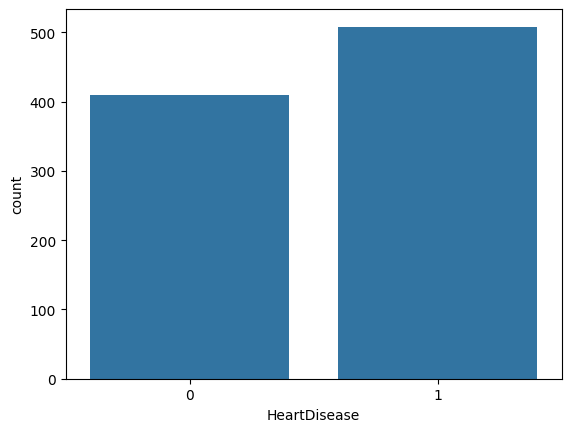

In [3]:
# counting the number of patients with heart diease 
sns.countplot(data=df,x='HeartDisease')

In [16]:
ChestPainType=df['ChestPainType'].value_counts()
RestingECG=df['RestingECG'].value_counts()
ExerciseAngina=df['ExerciseAngina'].value_counts()
ST_Slope=df['ST_Slope'].value_counts()
Sex=df['Sex'].value_counts()

In [17]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()
label_encoder = LabelEncoder()

# Apply LabelEncoder to the categorical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
# the label_encoder is a instance of LabelEncoder class used to encode the categorical data 
# the fit method learns about the mapping of categorical values and transforms the varibles nto numeric

correlation = data.corr()
correlation['HeartDisease'].sort_values()
#from the correlation it is evident that Oldpeak,ExerciseAngina is the most influential factors

ST_Slope         -0.558771
MaxHR            -0.400421
ChestPainType    -0.386828
Cholesterol      -0.232741
RestingECG        0.057384
RestingBP         0.107589
FastingBS         0.267291
Age               0.282039
Sex               0.305445
Oldpeak           0.403951
ExerciseAngina    0.494282
HeartDisease      1.000000
Name: HeartDisease, dtype: float64

<Axes: xlabel='ExerciseAngina', ylabel='Oldpeak'>

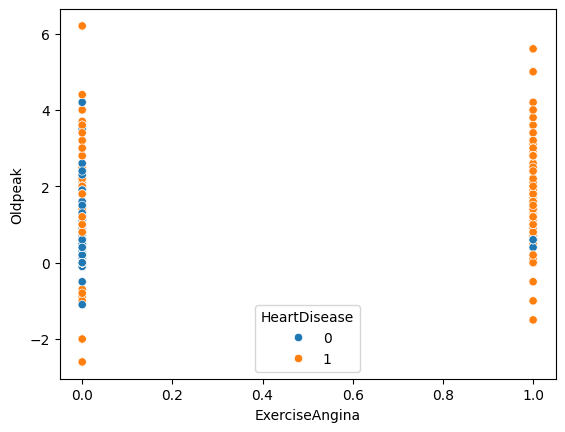

In [22]:
sns.scatterplot(data=data,x='ExerciseAngina',y='Oldpeak',hue='HeartDisease')
#the scatter plot depicts that individuals having the ExerciseAngina(pain after exercise) tend to experience more pain
# the higher value of old peak also tend to affect the heart rate

<Axes: xlabel='Sex', ylabel='Oldpeak'>

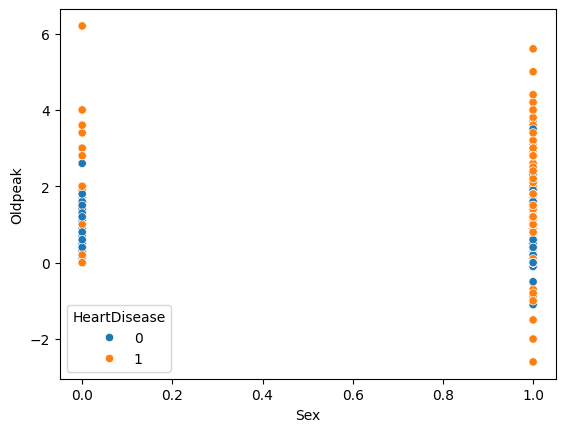

In [23]:
sns.scatterplot(data=data,x='Sex',y='Oldpeak',hue='HeartDisease')

In [41]:
outlier=data[(data['Sex']==0) & (data['Oldpeak']>=6)]
index=outlier.index

In [43]:
data=data.drop(index)
data.reset_index(drop=True,inplace=True)
# removing the inconsitent data

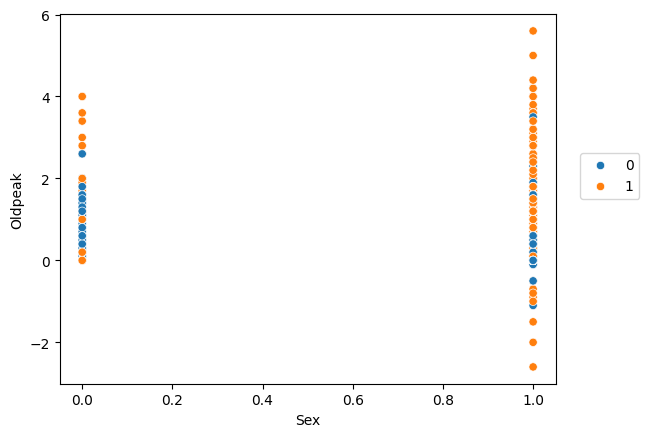

In [52]:

sns.scatterplot(data=data,x='Sex',y='Oldpeak',hue='HeartDisease')
plt.legend(loc=(1.05,0.5))

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [58]:
# standard scaler is used to form the co-efficients
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
operations=[('scaler',scaler),('knn',knn)]
pipe=Pipeline(operations)
k_values=list(range(1,20))
param_grid={'knn__n_neighbors':k_values}
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [62]:
y_pred=full_cv_classifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [63]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)

0.8731884057971014

In [64]:
confusion_matrix(y_pred,y_test)

array([[115,  19],
       [ 16, 126]], dtype=int64)

In [65]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       134
           1       0.87      0.89      0.88       142

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [69]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=17))])

In [89]:
# without grid cv cheaking
knn_model=KNeighborsClassifier(n_neighbors=17)
knn_model.fit(X_train,y_train)
y_pred1=knn_model.predict(X_test)

In [90]:
accuracy_score(y_pred1,y_test)

0.8731884057971014